In [ ]:
!pip install mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


SETUP

In [ ]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from tensorflow import keras

we have 60000 training images of (28, 28) pixels
60000 labels with 10 unique labels


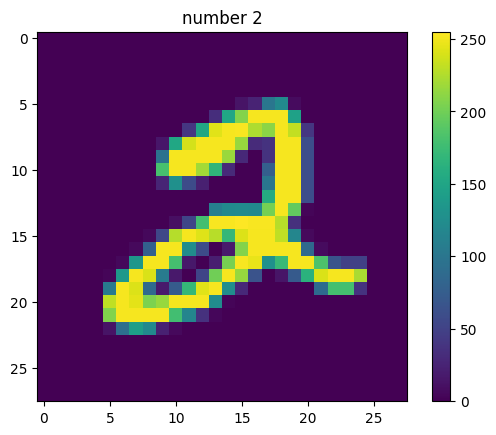

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(f'we have {train_images.shape[0]} training images of {train_images.shape[1:]} pixels')
print(f'{train_labels.shape[0]} labels with {len(np.unique(train_labels))} unique labels')

img_index = 5

plt.figure()
plt.imshow(train_images[img_index])
plt.title(f'number {train_labels[img_index]}')
plt.colorbar()
plt.grid(False)
plt.show()

PREPARING THE DATA

In [ ]:
# NORMALISE THE IMAGE PIXEL VALUES AROUND 0
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# FLATTEN THE IMAGES TO BE FED TO THE INPUT LAYER.

LETS BUILD THE MODEL

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = train_images.shape[1:]),
    #keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu', input_shape = (784,)),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(len(np.unique(train_labels)), activation = 'softmax')
])

LET'S COMPILE THE MODEL

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

NOW LET'S START TRAINING

In [ ]:
model.fit(
    train_images,
    keras.utils.to_categorical(train_labels),
    epochs = 15,
    batch_size = 32
)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/15
1421/1875 [=====================>........] - ETA: 1s - loss: 2.3014 - accuracy: 0.1119

KeyboardInterrupt: ignored

TESTING THE MODEL

In [ ]:
model.evaluate(
    test_images,
    keras.utils.to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 2.3067 - accuracy: 0.0974


[2.306713581085205, 0.09740000218153]

LET'S SAVE THE MODEL

In [ ]:
model.save_weights('model.h5')

TO LOAD A SAVED MODEL:

In [ ]:
model.load_weights('model.h5')

TO USE THE MODEL TO PREDICT

In [ ]:
predictions = model.predict(test_images[:])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))


313/313 [==============================] - 1s 1ms/step
[7 2 1 ... 4 5 6]


4


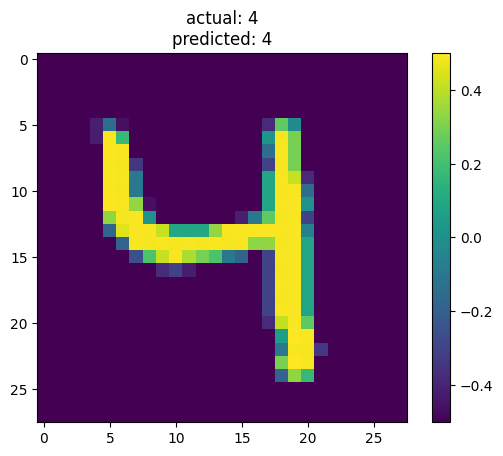

In [ ]:
img_index = 901

# to view the most probable class name:
print(np.argmax(predictions[img_index]))

# let's view the img:
plt.figure()
plt.imshow(test_images[img_index])
plt.title(f'actual: {test_labels[img_index]}\npredicted: {np.argmax(predictions[img_index])}')
plt.colorbar()
plt.grid(False)
plt.show()